# Parte 4: Teste de hipótese
Conduzir testes inferenciais adequados que possam dar base à tomada de decisão

In [323]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

Embora seja um clichê pensarmos que alguns grupos de países são mais avançados que outros, isso nem sempre se confirma quando observamos dados. Nesta parte do trabalho, verificaremos se temos dados suficientes para justificar afirmações como esta. Tome por base o modelo estatístico que você encontrou na etapa anterior para as classificações “avançado” ou “atrasado” de países e:

* 1- Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)).

* 2- Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.

* 3- Mostre, em uma figura, P(avançado|bloco) e os intervalos de confiança calculados. Há sobreposição dos intervalos de confiança? Quais?

* 4- Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu?


# Alternativa 1

In [324]:
df = pd.read_csv('aps3/govexpenditure.csv' , skiprows=4, decimal='.', encoding='latin')
df.head()

paises_eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden']
paises_otan = ['Albania', 'Algeria', 'Andorra', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina', 'Canada', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'United States']

# Excluindo os países repetidos
for pais in paises_eu:
    if pais in paises_otan:
        paises_otan.remove(pais)

# Criando um DataFrame com os países da OTAN, UE e um total
df_ue = df[df['Country Name'].isin(paises_eu)]
df_otan = df[df['Country Name'].isin(paises_otan)]
df_conjunto = pd.concat([df_ue, df_otan])

# Selecionando os anos indesejados do DataFrame
anos=[]
for ano in range(1960, 2005):
    anos.append(str(ano))


# Excluíndo colunas indesejadas
df_ue = df_ue.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_ue = df_ue.drop(anos, axis=1)
df_ue['media'] = df_ue.mean(axis=1)

df_otan = df_otan.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_otan = df_otan.drop(anos, axis=1)
df_otan['media'] = df_otan.mean(axis=1)
df_otan

df_conjunto = df_conjunto.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])
df_conjunto = df_conjunto.drop(anos, axis=1)
df_conjunto['media'] = df_conjunto.mean(axis=1)

# Calculando a média do conjunto de países da OTAN e UE
media = df_conjunto['media'].mean()


filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]


filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]


filtro_avancados_ue = df_ue['media'] > media                # Filtrar os países da União Europeia que estão acima da média
df_avancados_ue = df_ue[filtro_avancados_ue]

filtro_avancados_otan = df_otan['media'] > media            # Filtrar os países da OTAN que estão acima da média
df_avancados_otan = df_otan[filtro_avancados_otan]

filtro_avancados_total = df_conjunto['media'] > media       # Juntando os dois filtros
df_avancados_total = df_conjunto[filtro_avancados_total]

P_avancado_ue = len(df_avancados_ue) / len(df_ue)           # Probabilidade de ser avançado dado que é da UE
P_avancado_otan = len(df_avancados_otan) / len(df_otan)     # Probabilidade de ser avançado dado que é da OTAN

print(f'Probabilidade de ser avançado dado que é da UE: {P_avancado_ue * 100:.2f}%')
print(f'Probabilidade de ser avançado dado que é da OTAN: {P_avancado_otan * 100:.2f}%')


P_ue = len(df_ue) / len(df_conjunto)
P_otan = len(df_otan) / len(df_conjunto)
P_avancado = len(df_avancados_total) / len(df_conjunto)

#P(A|B) = P(B|A) * P(A) / P(B)

P_ue_avancado = P_avancado_ue * P_ue / P_avancado           # Probabilidade de ser da UE dado que é avançado
P_otan_avancado = P_avancado_otan * P_otan / P_avancado     # Probabilidade de ser da OTAN dado que é avançado

print(f'Probabilidade de ser da UE dado que é avançado: { P_ue_avancado * 100:.2f}%')
print(f'Probabilidade de ser da OTAN dado que é avançado: { P_otan_avancado * 100:.2f}%')

Probabilidade de ser avançado dado que é da UE: 38.46%
Probabilidade de ser avançado dado que é da OTAN: 56.52%
Probabilidade de ser da UE dado que é avançado: 43.48%
Probabilidade de ser da OTAN dado que é avançado: 56.52%


/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_23138/3292953081.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ue['media'] = df_ue.mean(axis=1)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_23138/3292953081.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_otan['media'] = df_otan.mean(axis=1)
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_23138/3292953081.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_conjunto['media'] = df_c

# 1- Para cada bloco, encontre a probabilidade de um país sorteado aleatoriamente naquele bloco ser da categoria “avançado” (isto é: P(avançado|bloco)). 

* Probabilidade de ser avançado dado que é da UE: 38.46%

* Probabilidade de ser avançado dado que é da OTAN: 56.52%

* Probabilidade de ser da UE dado que é avançado: 43.48%

* Probabilidade de ser da OTAN dado que é avançado: 56.52%

# Alternativa 2

In [325]:
# função para calcular a probabilidade de ser avançado dado um indicador
def calcula_probabilidade(lista,indicador):
    contador =0
    for i in range(len(lista)):
        if lista[i] >indicador:

            contador+=1
    return contador/len(lista)

# Método Bootstrapping, gerando várias amostars com reposição
# calculando a probabilidade de cada uma delas
# armazenando em uma lista
# retornando percentil 5 e 95
def reamostrar(lista,indicador):
    probabilidades = []
    for i in range(len(lista)):
        amostrai = np.random.choice(lista,size=len(lista),replace=True)
        pi = calcula_probabilidade(amostrai,indicador)
        probabilidades.append(pi)
    return np.percentile(probabilidades,5), np.percentile(probabilidades,95)


# 2- Usando bootstrapping, calcule o intervalo de confiança de 90% para P(avançado|bloco) para cada bloco.

In [326]:
# Usando as funções para calcular o intervalode conifaça de 90% para o indicador os dados da UE
ue = df_ue["media"]
low_ue, high_ue = reamostrar(list(ue), media)
print(low_ue,high_ue)



0.2403846153846154 0.5769230769230769


In [327]:
# Usando as funções para calcular o intervalode conifaça de 90% para o indicador os dados da OTAN
otan = df_otan["media"]
low_otan, high_otan = reamostrar(list(otan), media)
print(low_otan,high_otan)



0.31739130434782614 0.734782608695652


# Alternativa 3

In [328]:
# Posição da barra de erro no gráfico
y_ue = (high_ue +low_ue)/2
y_otan = (high_otan +low_otan)/2

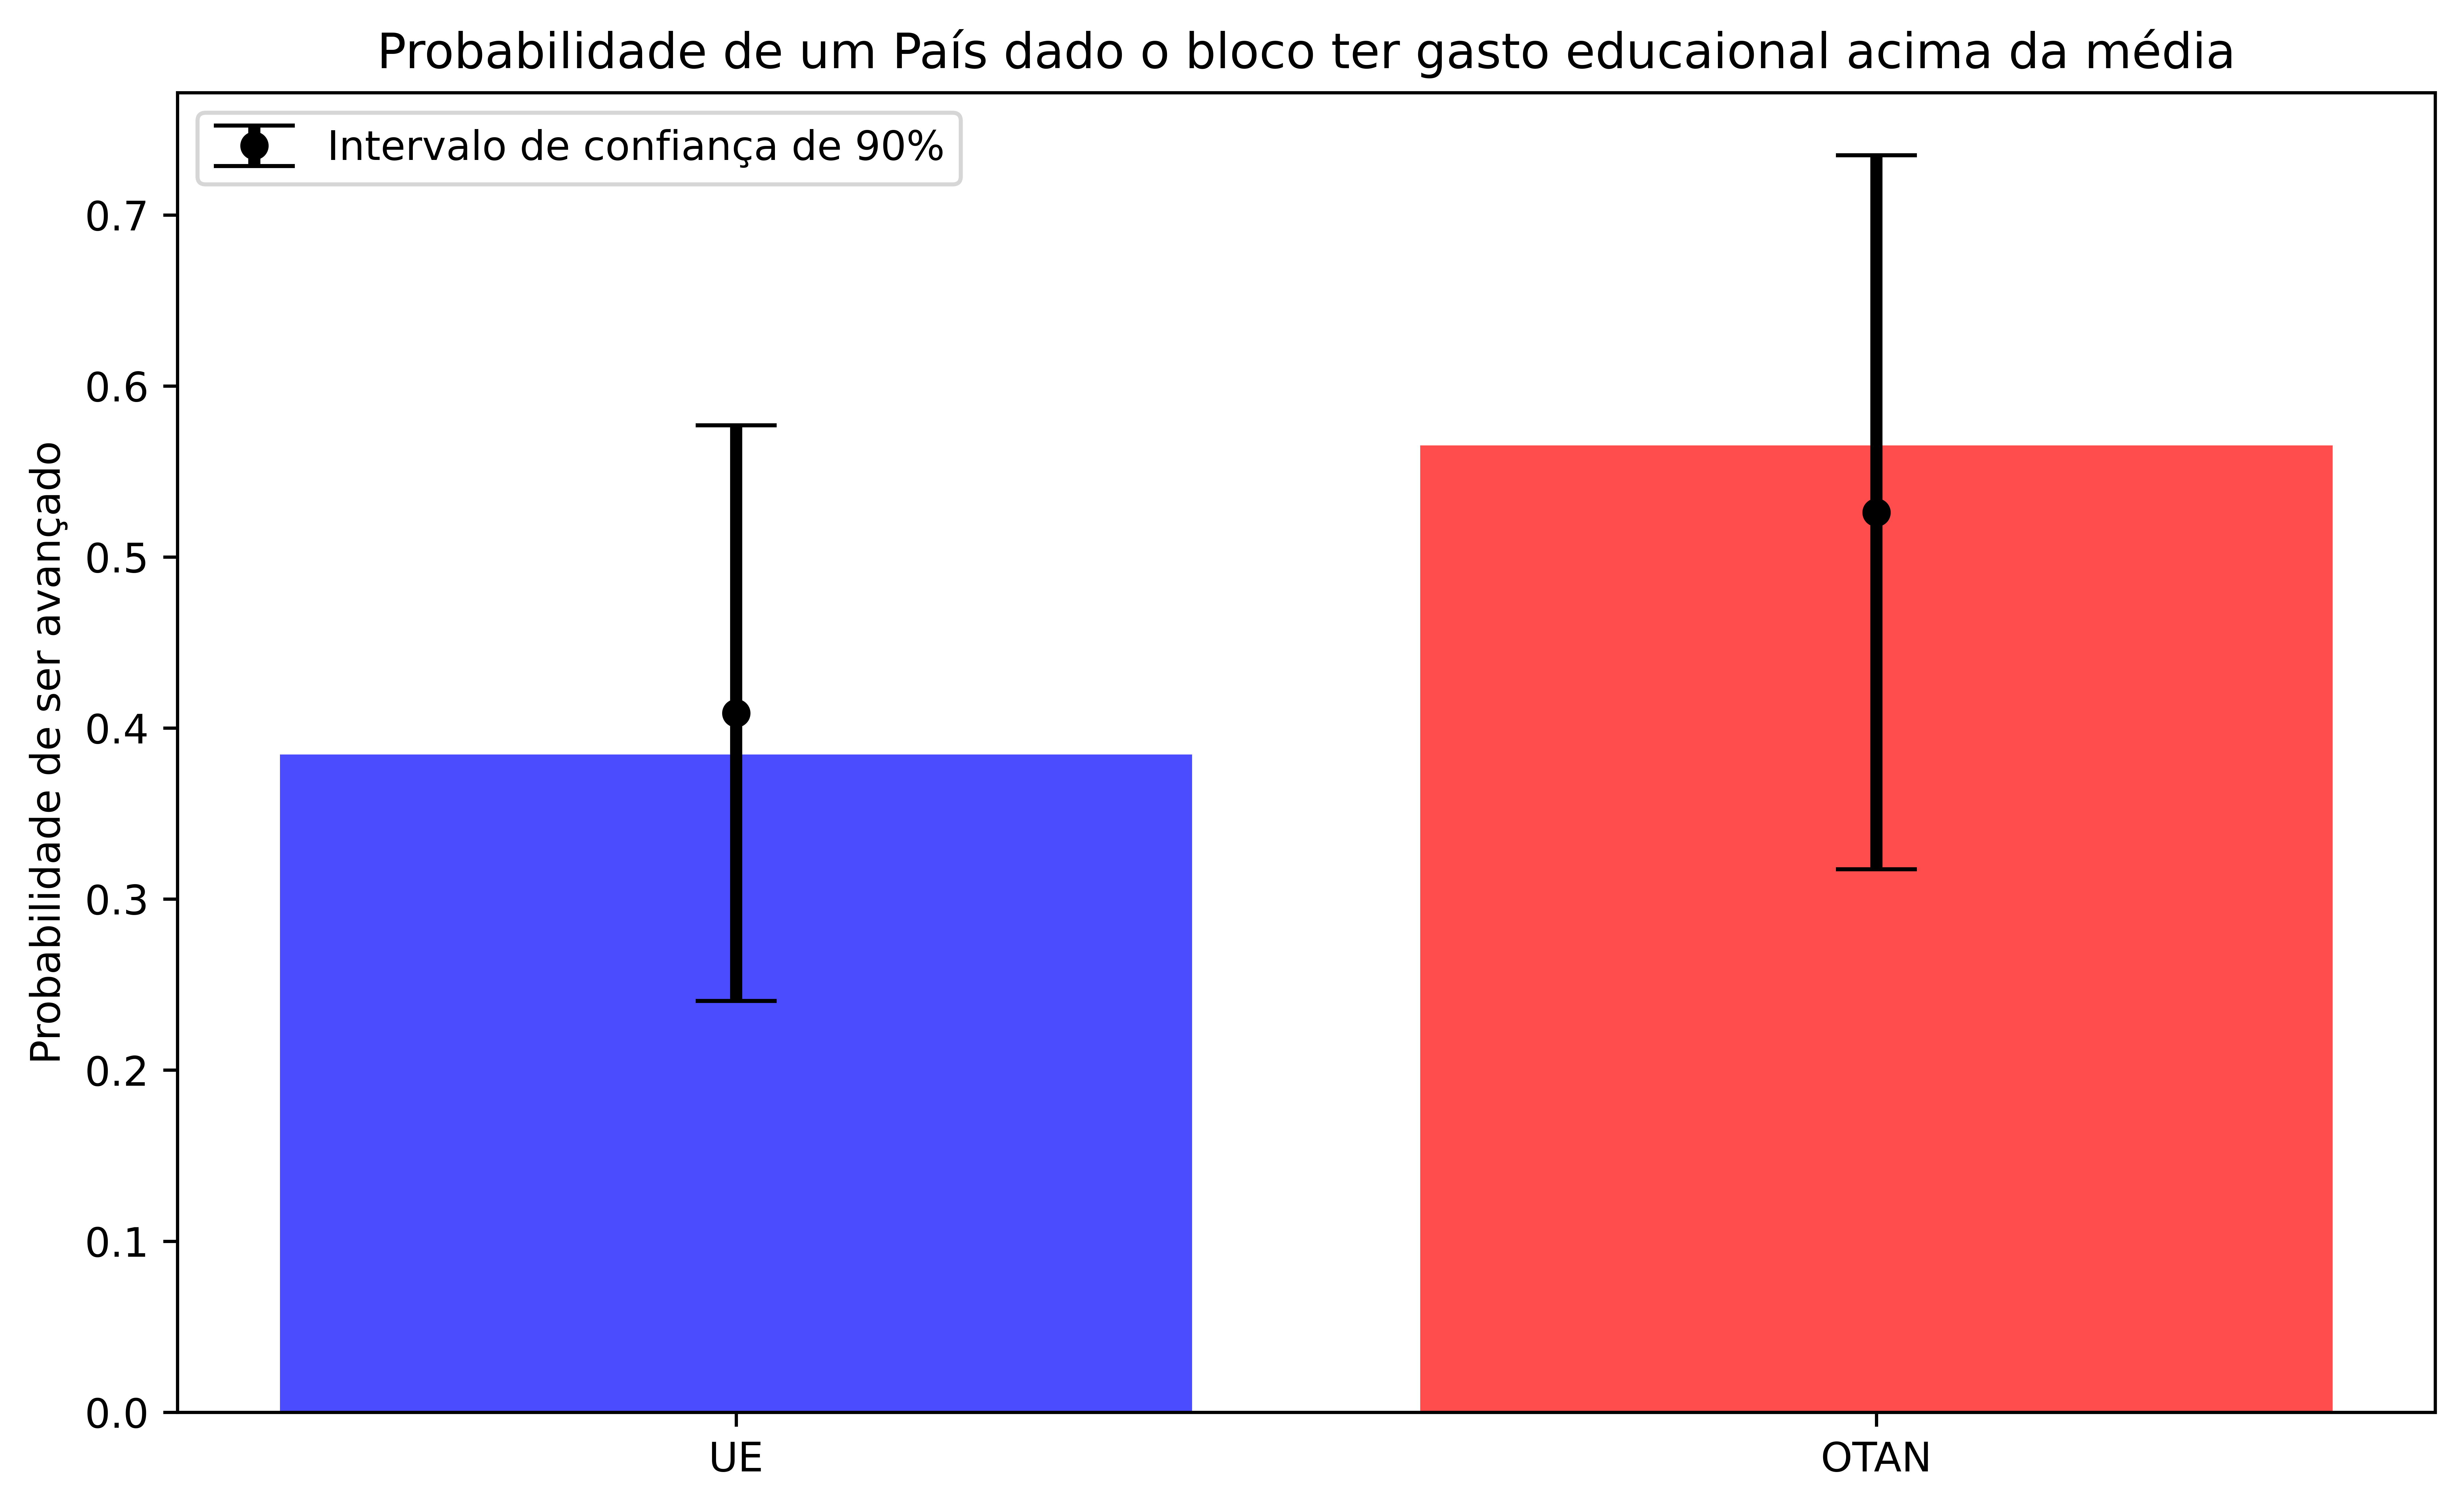

In [329]:
#grafico   

plt.figure(figsize=(10, 6),dpi=1000)
plt.bar(['UE', 'OTAN'], [P_avancado_ue, P_avancado_otan], color=['blue','red'],alpha=0.7)
plt.errorbar(0,y_ue, yerr=y_ue-low_ue, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=10)
plt.errorbar(1, y_otan, yerr=y_otan-low_otan, fmt='o', color='black', ecolor='black', elinewidth=3, capsize=10,label='Intervalo de confiança de 90%')
plt.legend()
plt.ylabel('Probabilidade de ser avançado')
plt.title('Probabilidade de um País dado o bloco ter gasto educaional acima da média')
plt.show()

# 3- Mostre, em uma figura, P(avançado|bloco) e os intervalos de confiança calculados. Há sobreposição dos intervalos de confiança? Quais?

In [330]:
# calculo da interseccao entre os intervalos de confiança

if high_otan > high_ue:
    interhigh = high_ue
else:
    interhigh = high_otan
if low_otan > low_ue:
    interlow = low_otan
else:
    interllow = low_ue

print("interseção dos intervalos de confianção",{"low":interlow,"high":interhigh})

interseção dos intervalos de confianção {'low': 0.31739130434782614, 'high': 0.5769230769230769}


# Alternativa 4

<h3> Levando em consideração os intervalos de confiança, seria seguro dizer que países de um bloco são tipicamente mais “avançados” que os de outro bloco em relação ao indicador que você escolheu? <h3>

Não é seguro fazer essa afiração, pois considerando os intervalos de confiança é possível observar que existe um grande intervalo de sobreposição (entre os intervalos de confiança do dois blocos). Isso indica que o indicador escolhido não é capaz de diferenciar bem um grupo do outro. Já que as probabilidades de ambos os grupos tendem a ser parecidas.
